In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data Manipulation

## Diamonds

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# Import data and describe
diamonds = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/4510/2025-Fall-Lecture/Final-Exam-4510/diamonds_casestudy.csv')
diamonds.head(n=5)

,carat,cut,color,clarity,depth,table,price,width,length,height
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75




*   Carat: Size
*   Cut: Brilliance: Ideal -> Premium -> Very Good -> Good -> Fair -> Poor
*   Clarity: Nubmer of natural flaws: IF (best) -> VVS1 -> VVS2 -> VS1 -> VS2 -> SI1 -> SI2 -> I1 (worst)
*   Color: Clear to yellow tint: D-F (clear- Colorless) -> G-J (near colorless), K-M (yellow tint)

In [ ]:
print(diamonds.shape) #how many rows?
print(len(diamonds))
diamonds.size  # size = rows * columns


(53940, 10)
53940


539400

### Row subsetting - boolean expression

In [ ]:
# boolean expression

#(diamonds.height > 5.43) & (diamonds["length"] > 9.5)

(diamonds.price > 20000) & (diamonds["carat"] > 2)

#diamonds['pirce'] >20000)

,0
0,False
1,False
2,False
3,False
4,False
...,...
53935,False
53936,False
53937,False
53938,False


In [ ]:
# find the diamonds, not a list of trues/falses
diamonds[(diamonds.price > 20000) | (diamonds["carat"] > 2) ]  # | is an or operator

,carat,cut,color,clarity,depth,table,price,width,length,height
12246,2.06,Premium,J,I1,61.2,58.0,5203,8.10,8.07,4.95
13002,2.14,Fair,J,I1,69.4,57.0,5405,7.74,7.70,5.36
13118,2.15,Fair,J,I1,65.5,57.0,5430,8.01,7.95,5.23
13757,2.22,Fair,J,I1,66.7,56.0,5607,8.04,8.02,5.36
13991,2.01,Fair,I,I1,67.4,58.0,5696,7.71,7.64,5.17
...,...,...,...,...,...,...,...,...,...,...
27741,2.15,Ideal,G,SI2,62.6,54.0,18791,8.29,8.35,5.21
27742,2.04,Premium,H,SI1,58.1,60.0,18795,8.37,8.28,4.84
27744,2.29,Premium,I,SI1,61.8,59.0,18797,8.52,8.45,5.24
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11


In [ ]:
#Count # of diamonds satisfying the conditions below:
((diamonds.price > 18000) & (diamonds["carat"] > 2.8)).sum()

# & -> and operator
#  | --> or operator

# You can use len or shape


np.int64(12)

In [ ]:
true_falses = (diamonds.price > 18000) & (diamonds["carat"] > 2.8)
print(diamonds[true_falses])
print(diamonds[true_falses].shape)
print(len(diamonds[true_falses]))
print(diamonds[true_falses].size)  # size = rows * columns


       carat      cut color clarity  depth  table  price  width  length  \
27415   5.01     Fair     J      I1   65.5   59.0  18018  10.74   10.54   
27514   3.01  Premium     I     SI2   60.2   59.0  18242   9.36    9.31   
27515   3.01     Fair     I     SI2   65.8   56.0  18242   8.99    8.94   
27516   3.01     Fair     I     SI2   65.8   56.0  18242   8.99    8.94   
27517   3.01     Good     I     SI2   63.9   60.0  18242   9.06    9.01   
27518   3.01     Good     I     SI2   63.9   60.0  18242   9.06    9.01   
27630   4.50     Fair     J      I1   65.8   58.0  18531  10.23   10.16   
27638   3.04  Premium     I     SI2   59.3   60.0  18559   9.51    9.46   
27649   3.01     Good     H     SI2   57.6   64.0  18593   9.44    9.38   
27679   3.51  Premium     J     VS2   62.5   59.0  18701   9.66    9.63   
27684   3.01  Premium     J     SI2   60.7   59.0  18710   9.35    9.22   
27685   3.01  Premium     J     SI2   59.7   58.0  18710   9.41    9.32   

       height  
27415   

In [ ]:
# Count # of diamonds satisfying->color = premium, clarity is IF and color is equal to D
((diamonds.cut == "Ideal") & (diamonds.clarity == "IF") & (diamonds.color == "D")).sum()


np.int64(28)

In [ ]:
# find the diamonds satisfying the following coditions: cut = Premium, color = E, and carat > 1.8
# diamonds[ (diamonds.cut == "Premium")  & (diamonds.color == "E") & (diamonds.carat > 1.8) ]

### Groupby

In [ ]:

diamonds.groupby(by = ['cut']).mean(numeric_only=True)
# Note that mean() can be applied to the columns with numerical values

,carat,depth,table,price,width,length,height
cut,,,,,,,
Fair,1.046137,64.036839,59.053789,4358.757764,6.246894,6.182652,3.982770
Good,0.849185,62.365436,58.694639,3928.864452,5.838785,5.850744,3.639507
Ideal,0.702837,61.709344,55.951668,3457.541970,5.507451,5.520080,3.401448
Premium,0.891955,61.264177,58.746095,4584.257704,5.973887,5.944879,3.647124
Very Good,0.806381,61.817683,57.956150,3981.759891,5.740696,5.770026,3.559801


### For each color, what is the average carat?


In [ ]:
# Hint --> use groupby

### missing values

In [ ]:
diamonds.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,50
table,0
price,0
width,0
length,0
height,0


In [ ]:
#What is the expression to replace the missing values for depth with its mean?

depth_mean = diamonds['depth'].mean() #you need to calculate the average/mean value of the column, depth

new_data_frame = diamonds[['depth']].fillna(value=depth_mean)  #Not going to change the orginal dataframe diamonds

print(new_data_frame)

       depth
0       61.5
1       59.8
2       56.9
3       62.4
4       63.3
...      ...
53935   60.8
53936   63.1
53937   62.8
53938   61.0
53939   62.2

[53940 rows x 1 columns]


In [ ]:
#If you want to permanently change the orignal datafrmae, diamonds

#diamonds['depth'] = diamonds[['depth']].fillna(value=depth_mean)
# Be carefull!! - don't this unless you want to change the original dataframe forever

#diamonds.isnull().sum()

# Logit Regiression - Chapter 7.5 --> Please see the classification Metrics (section 8.4) below


*   Please note that chapter 7.5 did not split the data set.
*   Chapter 8.4 split the data set into traning and test set in order to calculate the classification metrics.



# Training, Validation and test data set --> train_test_split() - Section 8.2

In [ ]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
trainingProportion = 0.70
validationProportion = 0.10
testProportion = 0.20



# Split off the test data
trainingAndValidationData, testData = train_test_split(
    WBCD, test_size=testProportion
)# Set the proportions of the training-validation-test split
#Note that test_size is used!



# Split the remaining into training and validation data
trainingData, validationData = train_test_split(
    WBCD,
    train_size=trainingProportion / (trainingProportion + validationProportion)
)
#Note that train_size is used instead of test_size!

#### how many rows for training data, validationData and testingData?

#Regression Metrics - Numerical Variables (Chapter 8.3)



*   Use the different data set (exam-customer.csv file)




In [ ]:
customer = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/4510/2025-Fall-Lecture/Final-Exam-4510/exam-customer.csv")
customer.head()

,CustID,Sex,Race,BirthDate,College,HouseholdSize,ZipCode,Income,Spending2020,Spending2021,NumOfOrders,DaysSinceLast,Satisfaction,Channel
0,1530016,Female,Black,12/16/1986,Yes,5,90047,53000,287.0,241.0,3,101,Very Dissatisfied,SM
1,1531136,Male,White,5/9/1993,Yes,5,90026,94000,1227.0,843.0,12,262,Neutral,TV
2,1532160,Male,Black,5/22/1966,Yes,2,90027,64000,523.0,719.0,9,122,Very Satisfied,TV
3,1532307,Male,White,9/16/1964,Yes,4,90029,60000,516.0,582.0,13,129,Very Dissatisfied,SM
4,1532356,Female,Hispanic,7/15/1964,No,5,90017,47000,555.0,845.0,7,97,Very Dissatisfied,Web


In [ ]:
customer.isnull().sum()

,0
CustID,0
Sex,0
Race,0
BirthDate,0
College,0
HouseholdSize,0
ZipCode,0
Income,0
Spending2020,7
Spending2021,5


In [ ]:
# to simply the process, drop all the rows with the missing values, NaN.
customer = customer.dropna()
customer.isnull().sum()

,0
CustID,0
Sex,0
Race,0
BirthDate,0
College,0
HouseholdSize,0
ZipCode,0
Income,0
Spending2020,0
Spending2021,0


In [ ]:
# Import packages
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [ ]:
X = customer["Spending2020"]
y = customer['Spending2021']

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123
)

print(type(X_test))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
# Create a linear model using the training set and predictions using the test set

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
linModel = LinearRegression()
linModel.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1)) # Fit

y_pred = np.ravel(linModel.predict(X_test.reshape(-1, 1)))  # Predict

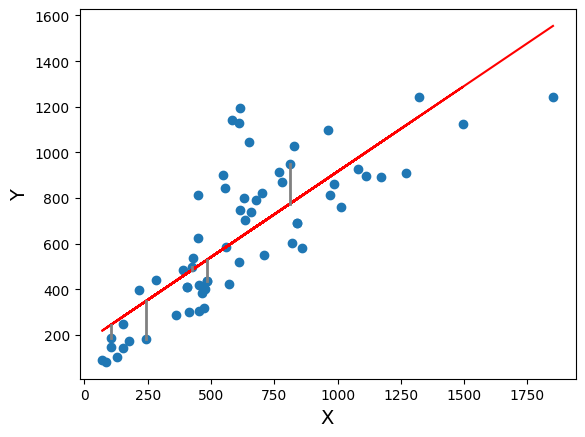

In [ ]:
# Display linear model and scatter plot of the test set
plt.scatter(X_test, y_test)
plt.xlabel("X", fontsize=14)
plt.ylabel("Y", fontsize=14)
plt.plot(X_test, y_pred, color='red')

for i in range(5):
    plt.plot([X_test[i], X_test[i]], [y_test[i], y_pred[i]], color='grey', linewidth=2)

In [ ]:
# Display MSE
#metrics.mean_squared_error(y_test, y_pred)
mean_squared_error(y_test, y_pred)

37265.325706168165

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

np.float64(193.04228994230297)

In [ ]:
#Display MAE
metrics.mean_absolute_error(y_test, y_pred)

155.4150838359777

### What are the mathematical expressions for MSE, RMSE, and MAE?

## Classification Metrics (Logit Regression is used) Section 8.4  

In [ ]:
# Import packages and functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Load the Wisconsin Breast Cancer dataset
WBCD = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/4510/2025-Fall-Lecture/Ch8-Performance/Data/WisconsinBreastCancerDatabase.csv')
WBCD.head()

,ID,Diagnosis,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave points mean,...,Radius worst,Texture worst,Perimeter worst,Area worst,Smoothness worst,Compactness worst,Concavity worst,Concave points worst,Symmetry worst,Fractal dimension worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Convert Diagnosis to 0 and 1
WBCD.loc[WBCD['Diagnosis'] == 'B', 'Diagnosis'] = 0
WBCD.loc[WBCD['Diagnosis'] == 'M', 'Diagnosis'] = 1

In [ ]:
# Store relevant columns as variables
X = WBCD[['Radius mean']].values.reshape(-1, 1)
y = WBCD[['Diagnosis']].values.reshape(-1, 1).astype(int)

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123
)

In [ ]:
np.ravel(y_train.astype(int))  # 2d array to 1d array

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,

In [ ]:
# Logistic regression predicting diagnosis from tumor radius
logisticModel = LogisticRegression()

logisticModel.fit(X_train, np.ravel(y_train.astype(int)))

LogisticRegression()

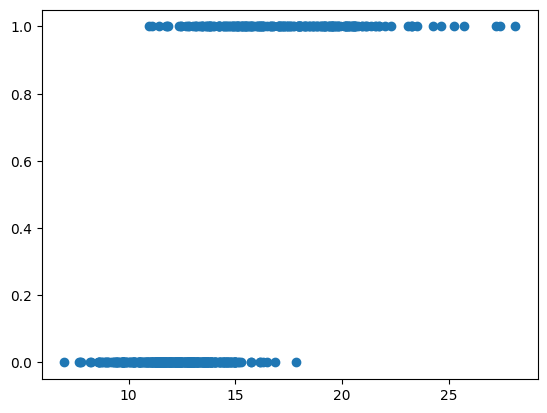

In [ ]:
plt.scatter(X,y)

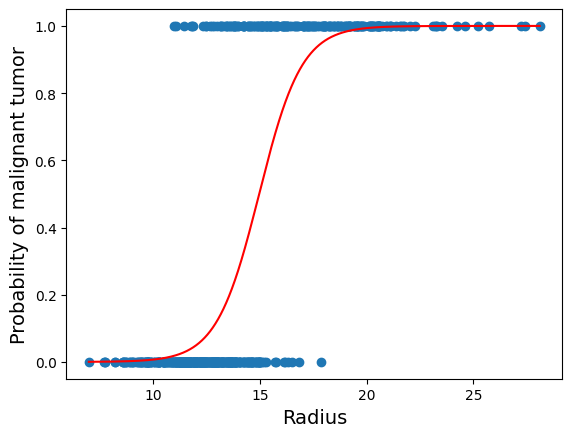

In [ ]:
plt.scatter(X,y)
xDelta = np.linspace(X.min(), X.max(), 10000)
yPredicted = logisticModel.predict(X).reshape(-1,1).astype(int) #either 0 or 1

#note that [:,1] is used below --> probability of tumor being malignant
yDeltaProb = logisticModel.predict_proba(xDelta.reshape(-1,1))[:,1]

plt.plot(xDelta, yDeltaProb, color ="red")
plt.xlabel("Radius", fontsize=14)
plt.ylabel("Probability of malignant tumor", fontsize=14)
plt.show()

In [ ]:
logisticModel.coef_  # This is b1 value --> positive slope (low to high sigmoid and determines the slope)

array([[1.00019878]])

In [ ]:
logisticModel.intercept_  #negative b0 --> shift the graph to the right. Thus probability = 0.5 (threshold) when radius = 15 (not 0)

array([-14.96553579])

In [ ]:
# Predict the probabilities for the test set
p_hat = logisticModel.predict_proba(X_test)

In [ ]:
pHatProb = logisticModel.predict_proba([[13]])
pHatProb
#This indicates the predicted probabilities for the two classes (Benign and Malignant)
#given an input feature value (e.g., Radius Mean of 13):

# 0.876: The model predicts an 87.6% probability that the tumor is Benign.
# 0.123: The model predicts a 12.3% probability that the tumor is Malignant.

array([[0.87685203, 0.12314797]])

In [ ]:
pHat = logisticModel.predict([[13]])  # if radius = 13, 0 means --> benigh
pHat

array([0])

#### Log Loss - metrics for (binary) classification

In [ ]:
# Predict the probabilities for the test set
p_hat = logisticModel.predict_proba(X_test)

In [ ]:
# Display the log-loss
metrics.log_loss(y_test, p_hat)

0.31342546048710135

In [ ]:
# What is the Log Loss value if true class y = 0 and predicted probability p_hat = 0.65?
# LL = -[(y*ln(p_hat)) + (1-y)*ln(1-p_hat)]

import numpy as np

LL = -((1)*np.log(1-0.65))
LL

np.float64(1.0498221244986778)

In [ ]:
# What is the log loss value if true class y = 1 and predicted probability p_hat = 0.65?

LL = -(1*np.log(0.65))   # compared to the previous case, less penalty.
LL

np.float64(0.4307829160924542)

# Section 8.5 - Binary classifcation metrics - please review my lecture note on Chapter 8.


*   Confusion metrics (TP, TN, FP, FN)
*   Accuracy, Precision and Recall
*   Code implementation: recall_score(), accuracy_score, precision_score()
*   ROC Curve
*   Review my chapter 8 HW assignment!!





#### Use the code in section 8.4

In [ ]:
logisticModel = LogisticRegression()
logisticModel.fit(X, np.ravel(y.astype(int)))

cutoff = 0.5  # You can change this value


yPredictedProb = logisticModel.predict_proba(X)[:, 1]
print(logisticModel.predict_proba(X))
#returns the predicted probabilites for each class for the input x.
#the first column --> probability fo the sample belonging to class 0
#second colum --> probability for the sample belonging to class 1.

yPred_instance = logisticModel.predict([[18]])
print(yPred_instance)

print(yPredictedProb[:10]) # print the first 10 elements (probabilities)

yPredLowCutoff = []
for i in range(0, yPredictedProb.size):
    if yPredictedProb[i] < cutoff:
        yPredLowCutoff.append(0)
    else:
        yPredLowCutoff.append(1)

print (yPredLowCutoff[:10])

[[3.50231698e-02 9.64976830e-01]
 [2.57045003e-03 9.97429550e-01]
 [6.31226875e-03 9.93687731e-01]
 ...
 [1.31122346e-01 8.68877654e-01]
 [2.49279099e-03 9.97507209e-01]
 [9.99232545e-01 7.67454839e-04]]
[1]
[0.96497683 0.99742955 0.99368773 0.03169326 0.99657781 0.08599925
 0.97294999 0.25507126 0.14189551 0.08680851]
[1, 1, 1, 0, 1, 0, 1, 0, 0, 0]


In [ ]:
# Display confusion matrix

metrics.confusion_matrix(y, yPredLowCutoff)



array([[333,  24],
       [ 45, 167]])

In [ ]:
# Display accuracy
metrics.accuracy_score(y, yPredLowCutoff)

0.8787346221441125

In [ ]:
# Display precision
metrics.precision_score(y, yPredLowCutoff)
#if precision is 87% --> among 100 predicted cancer cases, 87 of them are real cancer. (emphasis on the prediction)

0.8743455497382199

In [ ]:
# Display recall
metrics.recall_score(y, yPredLowCutoff)

#if recall = 78% --> among 100 actual cancer case, 78 of them are identified as cancer. (emphasis on the actual cancer cases)

0.7877358490566038

[0.96497683 0.99742955 0.99368773 0.03169326 0.99657781 0.08599925
 0.97294999 0.25507126 0.14189551 0.08680851]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.         0.00471698 0.18867925 0.19811321 0.24528302 0.27358491
 0.28301887 0.29245283 0.39150943 0.4009434 ]
[       inf 0.99999887 0.99624826 0.99617084 0.9936231  0.99257092
 0.99185868 0.99152078 0.97785359 0.97452263]
0.9375165160403784


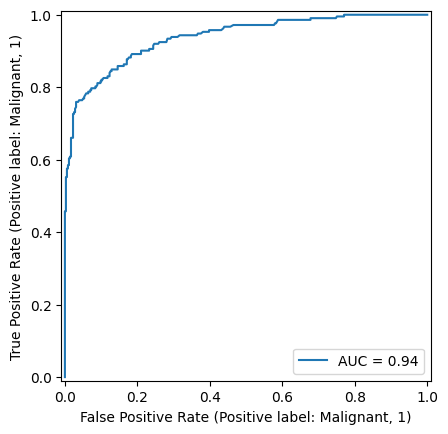

In [ ]:
# Plot the ROC curve
pred = logisticModel.predict_proba(X)[:, 1]
print(pred[:10])

fpr, tpr, thresholds = metrics.roc_curve(y, pred)
#false positive rate (1-specificity)
#true positive rate (sensitivite = recall)

print(fpr[:10])
print(tpr[:10])
print(thresholds[:10])


roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

display = metrics.RocCurveDisplay(
    fpr=fpr, tpr=tpr, roc_auc=roc_auc, pos_label='Malignant, 1'
)

display.plot()
plt.show()

#### Now change the cutoff to 0.1 (from 0.5 to 0.1) - What do you osbserve? Prevision score & Recall score? --> trade off.

What is the AUC value? increase or decrease? What is your conclusion?


In [ ]:
logisticModel = LogisticRegression()
logisticModel.fit(X, np.ravel(y.astype(int)))

cutoff = 0.1  # You can change this value


yPredictedProb = logisticModel.predict_proba(X)[:, 1]
print(logisticModel.predict_proba(X))
#returns the predicted probabilites for each class for the input x.
#the first column --> probability fo the sample belonging to class 0
#second colum --> probability for the sample belonging to class 1.

yPred_instance = logisticModel.predict([[18]])
print(yPred_instance)

print(yPredictedProb[:10]) # print the first 10 elements (probabilities)

yPredLowCutoff = []
for i in range(0, yPredictedProb.size):
    if yPredictedProb[i] < cutoff:
        yPredLowCutoff.append(0)
    else:
        yPredLowCutoff.append(1)

print (yPredLowCutoff[:10])

[[3.50231698e-02 9.64976830e-01]
 [2.57045003e-03 9.97429550e-01]
 [6.31226875e-03 9.93687731e-01]
 ...
 [1.31122346e-01 8.68877654e-01]
 [2.49279099e-03 9.97507209e-01]
 [9.99232545e-01 7.67454839e-04]]
[1]
[0.96497683 0.99742955 0.99368773 0.03169326 0.99657781 0.08599925
 0.97294999 0.25507126 0.14189551 0.08680851]
[1, 1, 1, 0, 1, 0, 1, 1, 1, 0]


In [ ]:
# Display confusion matrix

metrics.confusion_matrix(y, yPredLowCutoff)



array([[210, 147],
       [  9, 203]])

In [ ]:
#Display accuracy
metrics.accuracy_score(y, yPredLowCutoff)

0.7258347978910369

In [ ]:
# Display precision
metrics.precision_score(y, yPredLowCutoff)

0.58

In [ ]:
# Display recall
metrics.recall_score(y, yPredLowCutoff)


0.9575471698113207

[0.96497683 0.99742955 0.99368773 0.03169326 0.99657781 0.08599925
 0.97294999 0.25507126 0.14189551 0.08680851]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.         0.00471698 0.18867925 0.19811321 0.24528302 0.27358491
 0.28301887 0.29245283 0.39150943 0.4009434 ]
[       inf 0.99999887 0.99624826 0.99617084 0.9936231  0.99257092
 0.99185868 0.99152078 0.97785359 0.97452263]
0.9375165160403784


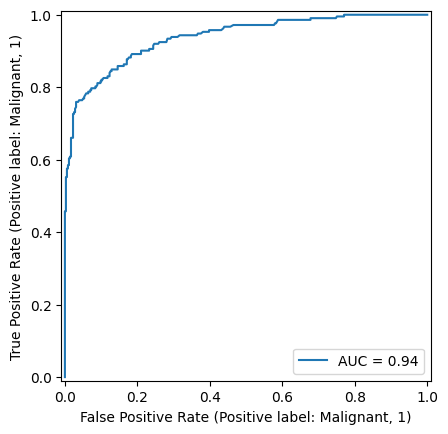

In [ ]:
# Plot the ROC curve
pred = logisticModel.predict_proba(X)[:, 1]
print(pred[:10])

fpr, tpr, thresholds = metrics.roc_curve(y, pred)
#false positive rate (1-specificity)
#true positive rate (sensitivite = recall)

print(fpr[:10])
print(tpr[:10])
print(thresholds[:10])


roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

display = metrics.RocCurveDisplay(
    fpr=fpr, tpr=tpr, roc_auc=roc_auc, pos_label='Malignant, 1'
)

display.plot()
plt.show()

# Section 8.6 Cross Validation


* Example: 5 fold cross-validation (K=5) with a dataset of 100 data points

   * each fold = 20 data points
   * perform 5 iterations.
   * fits 5 models.



In [ ]:
# Import packages and functions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
# Import dataset
badDrivers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/4510/2025-Fall-Lecture/Final-Exam-4510/bad-drivers.csv')

# Split off 20% of the data to be left out as test data
badDriversTrainingdata, testData = train_test_split(badDrivers, test_size=0.20)


# Store relevant columns as variables
X = badDriversTrainingdata[
    ['Losses incurred by insurance companies for collisions per insured driver ($)']
].values.reshape(-1, 1)
y = badDriversTrainingdata[['Car Insurance Premiums ($)']].values.reshape(-1, 1)
print(X.shape,y.shape)

badDriversTrainingdata

(40, 1) (40, 1)


,State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($)
9,Florida,17.9,21,29,92,94,1160.13,144.18
28,Nevada,14.7,37,32,95,99,1029.87,138.71
2,Arizona,18.6,35,28,84,96,899.47,110.35
17,Kentucky,21.4,19,23,78,76,872.51,137.13
47,Washington,10.6,42,33,82,86,890.03,111.62
8,District of Columbia,5.9,34,27,100,100,1273.89,136.05
1,Alaska,18.1,41,25,90,94,1053.48,133.93
20,Maryland,12.5,34,32,71,99,1048.78,192.70
6,Connecticut,10.8,46,36,87,82,1068.73,167.02
15,Iowa,15.7,17,25,97,87,649.06,114.47


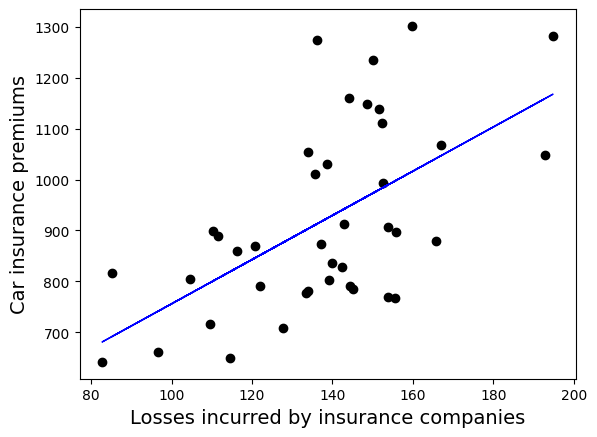

In [ ]:
# Fit a linear model to the data
linModel = LinearRegression()
linModel.fit(X, y)
yPredicted = linModel.predict(X)

# Plot the fitted model
plt.scatter(X, y, color='black')
plt.plot(X, yPredicted, color='blue', linewidth=1)
plt.xlabel('Losses incurred by insurance companies', fontsize=14);
plt.ylabel('Car insurance premiums', fontsize=14);

In [ ]:
# neg_mean_square_error is the negative MSE, so add a - so the scores are positive.
ten_fold_scores = -cross_val_score(
    linModel, X, y, scoring='neg_mean_squared_error', cv=10
)

print(ten_fold_scores)

print(ten_fold_scores.mean())

[19072.3699411  48698.10899155 18695.82926292 26712.10215219
 16930.38739712 24965.03041006 18401.25489426  9598.45641024
 12127.71286908 31967.27548846]
22716.852781697828


If you decrease CV from 10 --> 4, the mean square erro increases or decreases? (read my lecture note)


*   Smaller k -> the model gets simpler -> Higher Bias & Low Variance (the amount of data left fro training decreases
*   Larger K -> the model gets more complex -> Low Bias * High Variance  




# Section 9.2


In [ ]:
# Import needed packages for classification
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Import packages for visualization of results
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from mlxtend.plotting import plot_decision_regions

# Iport packages for evaluation
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
# Read data, clean up names

beans = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/4510/2025-Fall-Lecture/Final-Exam-4510/Dry_Bean_Dataset.csv')
print(beans.head())
beans['Class'] = beans['Class'].str.capitalize()
print(beans.shape)
beans.describe()
beans

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332  

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,Seker
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,Seker
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,Seker
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,Seker
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,Seker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,Dermason
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,Dermason
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,Dermason
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,Dermason


In [ ]:
# Initialize model
beanKnnClassifier = KNeighborsClassifier(n_neighbors=5)
# Split data
X = beans[['MajorAxisLength', 'MinorAxisLength']]
y = beans[['Class']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
#StandardScaler stanndardizes each feature to have a mean of 0 and a standard
#deviation of 1, ensuring all features contribute equally.
print(X_train_scaled)
print(y_train)
print(type(y_train))

[[-0.11601295 -0.33390907]
 [-0.26366634 -0.14726495]
 [-0.50871177 -0.69498544]
 ...
 [ 0.16446383 -0.24902008]
 [-0.90079247 -1.13530967]
 [-1.25561755 -1.14773841]]
          Class
8972       Sira
8982       Sira
7543       Sira
186       Seker
3338   Barbunya
...         ...
3442     Bombay
11430  Dermason
9738       Sira
11007  Dermason
10280  Dermason

[9527 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Train model and make predictions for the test set.
print(np.ravel(y_train))
print(type(np.ravel(y_train))) #dataframe --> one dim array
print('********************************')

beanKnnClassifier.fit(X_train_scaled, np.ravel(y_train))

y_pred = beanKnnClassifier.predict(scaler.transform(X_test))
y_pred

['Sira' 'Sira' 'Sira' ... 'Sira' 'Dermason' 'Dermason']
<class 'numpy.ndarray'>
********************************


array(['Sira', 'Seker', 'Barbunya', ..., 'Barbunya', 'Seker', 'Barbunya'],
      dtype=object)

In [ ]:
# Predict one bean
bean = pd.DataFrame(data={'MajorAxisLength':[ 400], 'MinorAxisLength': [200]}) #You are creating a dictionary!
#print(bean)
#print(scaler.transform(bean))
print(beanKnnClassifier.predict(scaler.transform(bean)))

['Horoz']


In [ ]:
#Another way to predict one bean
bean = [[400,200]]
beanKnnClassifier.predict(scaler.transform(bean))
#warning --> as bean does not have column/feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array(['Horoz'], dtype=object)

## Zybook made a mistake --> please use the following code:

The correct usage is:
- accuracy_score(y_test, y_pred)
- confusion_matrix(y_test, y_pred)

In [ ]:
# Compute metrics
print(metrics.accuracy_score(y_test, y_pred))
# calculate precision & recall
print(metrics.confusion_matrix(y_test, y_pred))

0.8687561214495593
[[ 280    0   86    0    4    5   19]
 [   0  148    0    0    0    0    0]
 [  67    0  418    0    8    1    0]
 [   0    0    0 1012    0   20   77]
 [   3    0   17    8  518    0   18]
 [   7    0    0   17    0  562   20]
 [   6    0    5  114   17   17  610]]


In [ ]:
beanKnnClassifier.classes_

array(['Barbunya', 'Bombay', 'Cali', 'Dermason', 'Horoz', 'Seker', 'Sira'],
      dtype=object)

# My Final Comments:


*   Task 1: Review Final-Exam-4510 code (my Tu & Thr lecture recordings)
*   Task 2: HW: Ch8-Part1, HW-ROC-AUC, CH8-Quiz
*   Task 3: review att quizzes



